In [3]:
import os
from glob import glob as lsdir
import numpy as np
import pandas as pd
from nilearn.plotting import plot_stat_map
import matplotlib.pyplot as plt


import seaborn as sns

import IPython
#import datalad.api as dl

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

#from nltools.data import Brain_Data, Design_Matrix, Adjacency
#from nltools.mask import expand_mask, roi_to_brain
import nibabel as nib
from nilearn import plotting
import seaborn as sns

In [4]:
from nilearn.maskers import NiftiSpheresMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn import image
from os import listdir, makedirs
from os.path import isfile, join, exists
import time

In [5]:
from nilearn import image 
from nilearn.plotting import plot_roi
from nilearn.masking import apply_mask
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import NiftiMapsMasker


# Defining Mask

## Cognitive_ToM

In [4]:
Cognitive_mask = nib.load("/imaging/ssaljoughi/masks/Cognitive_ToM.nii")


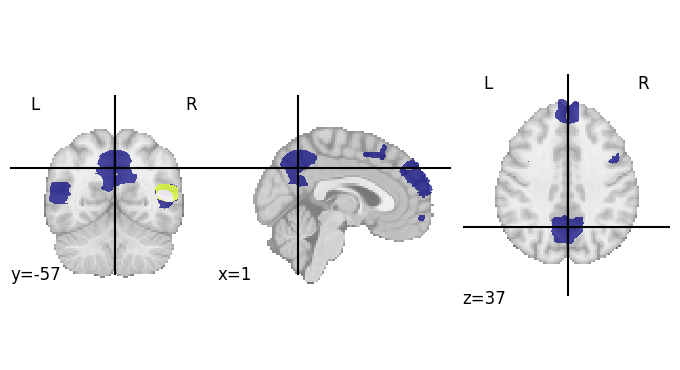

In [5]:
plot_roi(Cognitive_mask)

In [21]:
#path = "/imaging/ssaljoughi/masks/Cognitive"
path = "/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/Data/masks/Cognitive"
Cog_ROI = [folder for folder in listdir(path) if folder.endswith(".nii")]

In [22]:
Cog_masks = []
Cog_labels = []
i=0
for cluster in range(1,12):
    for ROI in Cog_ROI:
        str = ROI[-8:-4]
        new_str = str.replace("_cl","").replace("cl","")
        if int(new_str)==cluster:
            Cog_masks.append([nib.load(join("/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/Data/masks/Cognitive",ROI)),cluster,ROI[:-8]])
            #visualization  = plot_roi(Cog_masks[i][0], title=f"cluster:{cluster} , ROI :{ROI[:-8]} ")
            #visualization.savefig(join("/imaging/ssaljoughi/masks/Cognitive/",f"{ROI[:-8]}.png"))
            Cog_labels.append(ROI[:-8])
            i = i+1
            
            

In [23]:
len(Cog_labels)

19

## Affective mask

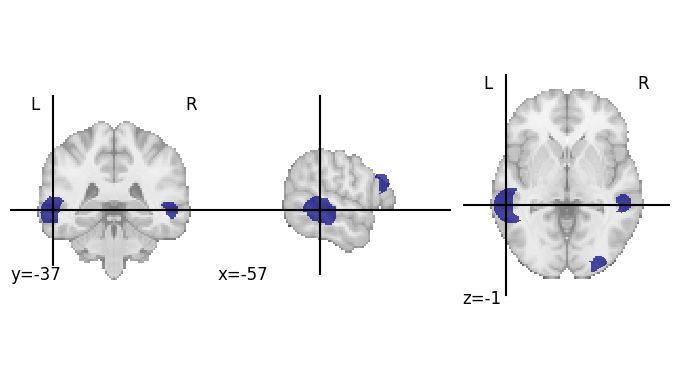

In [9]:
Aff_mask = nib.load("/imaging/ssaljoughi/masks/Affective_ToM.nii")
plot_roi(Aff_mask)

In [24]:
#path = "/imaging/ssaljoughi/masks/Affective"
path = "/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/Data/masks/Affective"
Aff_ROI = [folder for folder in listdir(path) if folder.endswith(".nii")]

In [25]:
Aff_masks = []
Aff_labels = []
i=0
for cluster in range(1,9):
    for ROI in Aff_ROI:
        str = ROI[-8:-4]
        new_str = str.replace("_cl","").replace("cl","")
        if int(new_str)==cluster:
            Aff_masks.append([nib.load(join("/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/Data/masks/Affective/",ROI)),cluster,ROI[:-8]])
            #visualization  = plot_roi(Aff_masks[i][0], title=f"cluster:{cluster} , ROI :{ROI[:-8]} ")
            #visualization.savefig(join("/imaging/ssaljoughi/masks/Affective/",f"{ROI[:-8]}.png"))
            Aff_labels.append(ROI[:-8])
            i = i+1
            
            

## Empathy masks

In [26]:
#path = "/imaging/ssaljoughi/masks/empathy"
path = "/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/Data/masks/empathy"
Emp_ROI = [folder for folder in listdir(path) if folder.endswith(".nii")]

In [27]:
Emp_masks = []
Emp_labels = []
i=0
for cluster in range(1,10):
    for ROI in Emp_ROI:
        str = ROI[-8:-4]
        new_str = str.replace("_cl","").replace("cl","")
        if int(new_str)==cluster:
            Emp_masks.append([nib.load(join("/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/Data/masks/empathy/",ROI)),cluster,ROI[:-8]])
            #visualization  = plot_roi(Emp_masks[i][0], title=f"cluster:{cluster} , ROI :{ROI[:-8]} ")
            #visualization.savefig(join("/imaging/ssaljoughi/masks/empathy/",f"{ROI[:-8]}.png"))
            Emp_labels.append(ROI[:-8])
            i = i+1
            
            

## Resampling Masks

In [14]:
sample_path = "/imaging/wilson/MovieData/Release7/Age12/BioBank_Analysis_All/aamod_firstlevel_modelestimate_saveresids_00001/sub-NDARAN076TPG/swrsub-NDARAN076TPG_task-movieDM_bold_0275.nii"
sample_nifti = nib.load(sample_path)
resample_Cog_mask = []
for i in range(0,len(Cog_masks)):
    resample_Cog_mask.append(image.resample_to_img(Cog_masks[i][0], sample_nifti))
    



In [15]:
resample_Aff_mask = []
for i in range(0,len(Aff_masks)):
    resample_Aff_mask.append(image.resample_to_img(Aff_masks[i][0], sample_nifti))


In [16]:
resample_Emp_mask = []
for i in range(0,len(Emp_masks)):
    resample_Emp_mask.append(image.resample_to_img(Emp_masks[i][0], sample_nifti))

# general mask

In [40]:
mask_T = Cog_masks+Aff_masks+Emp_masks

In [41]:
labels_T = Cog_labels+ Aff_labels+Emp_labels

# Apply Mask and generate FC

In [24]:
def generate_FC(subject_concat_image,masks):

    masker = NiftiMapsMasker(
    maps_img=masks,
    standardize=True)

    connectivity_measure = ConnectivityMeasure(
    kind="correlation",
    standardize=True,
    )
    time_series = masker.fit_transform(subject_concat_image)
    correlation_matrix = connectivity_measure.fit_transform([time_series])[
    0
    ]
    return masker,correlation_matrix,time_series
    

# Apply for all subjects

## Directory

In [173]:
output_path = "/imaging/ssaljoughi/FC"
aa_folder = 'BioBank_Analysis_All/'
bb_folder = 'BioBank_Analysis/'
saveresids_folder = 'aamod_firstlevel_modelestimate_saveresids_00001/'

In [174]:
count = 0
age_count = np.zeros(20,dtype = int)
for age in range(7,16):
    print("Processing age:", age)
    age_dir = f'/imaging/wilson/MovieData/Age{age}/'
    #age_dir = f'/imaging/klyons-from-imaging/fMRI/CBS_DevCog/BioBankData/Age{age}Data/'
    input_path = join(age_dir, bb_folder, saveresids_folder)
    # Grab all subjects
    subjects = [folder for folder in listdir(input_path) if folder.startswith("sub-")]
    for subject in subjects:
        print("Processing subject:", subject)
        subject_input_path = join(input_path, subject)
        subject_output_path = join(output_path,f'Age{age}',f"{subject}")
        # Check if we've already generated the FC for this subject
        #if exists(subject_output_path):
         #   print("  Skipping subject due to already generated FC.")
         #   continue
        
        subject_niftis = [join(subject_input_path, f) for f in listdir(subject_input_path) 
                          if isfile(join(subject_input_path, f)) and f.startswith('ResI')]
        if len(subject_niftis) < 740:
            print("  Incomplete subject niftis:", len(subject_niftis))
            continue
        subject_niftis.sort()
        if(subject_niftis==[]):
            continue
        else:
                
            subject_concat_image = image.concat_imgs(subject_niftis)  ## window time
            #Ment_fc_R, time_series= generate_power_fc_matrix(subject_concat_image_R,Ment_coords)
            masker_cog,Cog_ToM_FC, Cog_ToM_TS = generate_FC(subject_niftis,resample_Cog_mask)
            masker_aff,Aff_ToM_FC, Aff_ToM_TS = generate_FC(subject_concat_image,resample_Aff_mask)
            masker_T,FC_T, TS_T = generate_FC(subject_niftis,mask_T)
            masker_Emp,Emp_FC,Emp_TS = generate_FC(subject_niftis,resample_Emp_mask)
            #Aff_ToM_fc_R, time_series_Aff= generate_power_fc_matrix(subject_concat_image_R,Aff_ToM_coords)
            makedirs(subject_output_path)
            #subject_Ment_filename_R = join(subject_output_path, 'Ment.npy')
            #np.save(subject_Ment_filename_R, Ment_fc_R)
            subject_cog_filename = join(subject_output_path, 'Cog.npy')
            np.save(subject_cog_filename, Cog_ToM_FC)
            subject_Aff_filename = join(subject_output_path, 'Aff.npy')
            np.save(subject_Aff_filename, Aff_ToM_FC)
            subject_T_filename = join(subject_output_path, 'FC.npy')
            np.save(subject_T_filename, FC_T)
            subject_Emp_filename = join(subject_output_path, 'Emp.npy')
            np.save(subject_Emp_filename, Emp_FC)
            #subject_aff_filename_R = join(subject_output_path, 'Aff.npy')
            #np.save(subject_aff_filename_R, Aff_ToM_fc_R)
            #ToM_fc_R, time_series= generate_power_fc_matrix(subject_concat_image_R,ToM_coords)
            #subject_ToM_filename_R = join(subject_output_path, 'CogAndAff.npy')
            #np.save(subject_ToM_filename_R, ToM_fc_R)"""
        

Processing age: 7


PermissionError: [Errno 13] Permission denied: '/imaging/wilson/MovieData/Age7/BioBank_Analysis/aamod_firstlevel_modelestimate_saveresids_00001/'